# pandas - working with tabular data

*notebook by Dr. Jeffrey N. A. Aryee*

In this session, you will be introduced to the fundamentals of Pandas and its regular usage.

The `pandas` library is the best python package for working with tabular data (i.e. data that is organised into rows and columns) and is one of the most preferred tools for data scientists to perform data manipulation and analysis. It is built on fundamental libraries, such as, `matplotlib` for data visualization and `numpy`, for scientific computing. The fast, flexible `pandas` data structures are designed to make real-world data analysis significantly easier, however it takes consistency in practice to master.


## What's pandas for?

Pandas has so many uses. It is essentially your data’s home. Through `pandas`, you get acquainted with your data by cleaning, transforming, and analyzing it. There are numerous tasks you can perform with Pandas on a dataset, which include but is not limited to:

- Calculating statistics of the data, and making inferrence such as
    - What's the average, median, max, or min of each column?
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?, etc.
- Clean the data (eg. removing missing values and filtering rows or columns by certain criteria)
- Visualize the data using Matplotlib or Seaborn.
- Store the cleaned, transformed data into other file.

**Objectives**

The objective of this course is to introduce participants to the functionality of Pandas, with a primal focus on the underlisted:


1. [Installing Pandas](#1.-How-to-Install-Pandas)
2. [Importing Pandas](#2.-importing-pandas)
3. [Creating Data Series and Dataframes with Pandas](#3.-Creating-Data-Series-and-Data-frames-with-Pandas)
4. [Assessing Dataframe/Series information](#4.-Series/DataFrame-Information)
5. [Data Selection](#5.-Selection-from-Data-Series-and-DataFrames)
6. [Applying functions on a dataframe](#6.-Applying-functions-onto-a-dataframe)
7. [Data sorting and ranking with Pandas](#7.-Sort-and-Rank-with-Pandas)
8. [Dropping data values](#8.-Dropping-values-from-rows-(axis=0)-or-columns-(axis=1))
9. [Replacing dataframe elements with new value](#9-.-Replacing-dataframe-elements-with-a-new-value)
10. [Working with time series in Pandas](#10.-Working-with-Timeseries-in-Pandas): creating timeseries data, slicing and visualization with matplotlib
11. [Working with csv files in Pandas](#11.-working-with-Comma-separated-(.csv)-files-in-pandas)
12. [Visualization with Seaborn](#12.-Visualization-with-seaborn)
13. [Grouping Data with Groupby() function](#13.-Grouping-Data-with-Groupby-function)

### 1. How to Install Pandas

Being a pure python package `pandas` can be installed either with `pip` or with `conda`. `pandas` is included with the `conda` environment for the course, but in general you would install by opening up your terminal / command line and install using either:
        
```bash
$> conda install pandas
```

or

```bash
$> pip install pandas
```

Precede the commands with (!) if you are attempting to install via the Jupyter cell or Spyder console (`!pip install pandas`).

### 2. importing `pandas`

By convention the pandas package is usually imported as `pd` as a shorthand (so that we don't have to type out `pandas` every time). We will also be using `numpy` so we'll import that too (as `np`, as is the usual convention):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You can make use of the `help()` function with any pandas function/module and this produces a long-list documentation on use of the particular feature.

eg. `help(pd.date_range)`

In [ ]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize: 'bool' = False, name: 'Hashable' = None, closed: "Literal['left', 'right'] | None | lib.NoDefault" = <no_default>, inclusive: 'IntervalClosedType | None' = None, **kwargs) -> 'DatetimeIndex'
    Return a fixed frequency DatetimeIndex.
    
    Returns the range of equally spaced time points (where the difference between any
    two adjacent points is specified by the given frequency) such that they all
    satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
    the first and last time points in that range that fall on the boundary of ``freq``
    (if given as a frequency string) or that are valid for ``freq`` (if given as a
    :class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
    ``end``, or ``freq`` is *not* specified, this missing parameter can be computed
    given ``periods``, the 

### 3. Creating Data Series and Data frames with Pandas

The primary two components of pandas are the Series (essentially a column) and DataFrame (multi-dimensional table made up of a collection of Series).

In [ ]:
# Creating a series in pandas
ds = pd.Series([3, -5, 7, 4], index=["Day 1", "Day 2", "Day 3", "Day 4"])
ds
type(ds)

pandas.core.series.Series

Next we'll create a DataFrame which can contain multiple columns of data.

An easy way to do this is to first create a dictionary of our data. A dictionary is a data type in Python and it is used to store data values in key:value pairs, contained in curly brackets. The dictionary should then have and item for each column, with the values for each item being list of the data values we want to put into the data frame.  We can then use the `.keys()` function of the dictionary to provide the column names:

In [ ]:
data = {
    "v": [30.2, 31.4, 32.5, 28.9],
    "u": [21.2, 10.4, 0, 2],
    "t": [2.1, 3.4, 8.2, 4.1],
    "Direction": ["SW", "S", "N", "NE"],
}

# Create a dataframe from the data and set the keys as column headers
df = pd.DataFrame(data, columns=data.keys())
df

,v,u,t,Direction
0,30.2,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


In [ ]:
type(df)

pandas.core.frame.DataFrame

### 4. Series/DataFrame Information

We will next have a quick look into the data properties and some intrinsic functions. NOTE: by default aggregation funtions (like calculation of the mean or min) skip any NaN (not-a-number) values

In [ ]:
df.head(n=5)  # show the first n (5 by default) rows of the dataframe

,v,u,t,Direction
0,30.2,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


In [ ]:
df.shape  # Provides the shape of the dataframe

(4, 4)

In [ ]:
df.size  # Provides the size of the dataframe

16

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   v          4 non-null      float64
 1   u          4 non-null      float64
 2   t          4 non-null      float64
 3   Direction  4 non-null      object 
dtypes: float64(3), object(1)
memory usage: 256.0+ bytes


In [ ]:
df.columns  # Provides the column headers

Index(['v', 'u', 't', 'Direction'], dtype='object')

In [ ]:
df.index  # Provides the row index of the dataframe

RangeIndex(start=0, stop=4, step=1)

In [ ]:
df.describe()  # Gives a summarized statistical information of the data

,v,u,t
count,4.000000,4.00000,4.000000
mean,30.750000,8.40000,4.450000
std,1.550269,9.64987,2.633755
min,28.900000,0.00000,2.100000
25%,29.875000,1.50000,3.075000
50%,30.800000,6.20000,3.750000
75%,31.675000,13.10000,5.125000
max,32.500000,21.20000,8.200000


In [ ]:
df.count()  # Provides the number of elements within the dataframe.

v            4
u            4
t            4
Direction    4
dtype: int64

In [ ]:
df.sum()  # Provides the summation of the dataframe elements.

v             123.0
u              33.6
t              17.8
Direction    SWSNNE
dtype: object

In [ ]:
df.cumsum()  # Provides the cumulative sum of the dataframe elements.

,v,u,t,Direction
0,30.2,21.2,2.1,SW
1,61.6,31.6,5.5,SWS
2,94.1,31.6,13.7,SWSN
3,123.0,33.6,17.8,SWSNNE


In [ ]:
df.min()  # Provides the minimumn of the dataframe elements.

v            28.9
u             0.0
t             2.1
Direction       N
dtype: object

In [ ]:
df.max()    # Provides the maximum of the dataframe elements.

v            32.5
u            21.2
t             8.2
Direction      SW
dtype: object

In [ ]:
df.mean()  # Provides the average of the dataframe elements.

<ipython-input-19-147abd40d3bd>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()  # Provides the average of the dataframe elements.


v    30.75
u     8.40
t     4.45
dtype: float64

In [ ]:
df.median()  # Provides the midpoint of the dataframe elements.

<ipython-input-20-0efb28ac8b90>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()  # Provides the midpoint of the dataframe elements.


v    30.80
u     6.20
t     3.75
dtype: float64

### 5. Selection from Data Series and DataFrames

The row numbers are the 'index' and the headers represent each column.

In [ ]:
type(df["u"])

pandas.core.series.Series

In [ ]:
# DataFrame Selection
df[0:1]  # First row only
df[::2]  # Even rows/index
df[1::2]  # Odd rows/index

,v,u,t,Direction
1,31.4,10.4,3.4,S
3,28.9,2.0,4.1,NE


In [ ]:
# Selecting/Subsetting By Position
df.iloc[0]  # Elements of firat row only

v            30.2
u            21.2
t             2.1
Direction      SW
Name: 0, dtype: object

In [ ]:
# Select single value by row and column
df.iloc[[0], [0]]  # Element in first row and first column

,v
0,30.2


In [ ]:
# Selecting/Subsetting By Position
# Using iat
df.iat[0, 0]

30.2

By Label
Select single value by row and column labels
Any of the understated helps to do the same thing.

In [ ]:
df.loc[[0], ["u"]]

,u
0,21.2


In [ ]:
df.loc[0, "u"]

21.2

In [ ]:
df.loc[0]["u"]

21.2

We can index into a `DataSeries` too

In [ ]:
ds

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

In [ ]:
ds["Day 1"]

3

In [ ]:
ds["Day 1":"Day 4"]

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

In [ ]:
ds["Day 1":"Day 4":2]

Day 1    3
Day 3    7
dtype: int64

**selection with boolean Indexing**

An alternative for identifying elements of a dataframe that meet a specific criteria is to pass the criteria within a square brackets attached to the dataframe.

For example:

`a[a>1]` implies extracting all a elements where the value of a exceeds 1.

In [ ]:
# Boolean Indexing
ds[~ds > 2]  # Dataseries values not exceeding 2

Day 2   -5
dtype: int64

In [ ]:
ds[(ds > -2) & (ds < 5)]  # Dataseries values ranging from -1 to 4

Day 1    3
Day 4    4
dtype: int64

In [ ]:
ds[(ds > -2) | (ds < 5)]  # Dataseries values either exceeding -2 or below 5

Day 1    3
Day 2   -5
Day 3    7
Day 4    4
dtype: int64

In [ ]:
# Use filter to adjust DataFrame
# Dataframe item where only the final velocity (v) exceeds 32 m/s
df[df["v"] > 32]

,v,u,t,Direction
2,32.5,0.0,8.2,N


In [ ]:
# Assigning a value to index of a Series or DataFrame
ds["Day 1"] = 6  # Assigning by data series' index

In [ ]:
df.iloc[0, 0] = 34  # Assigning value to first element of the dataframe

## 6. Applying functions onto a dataframe

A function is a block of code which only runs when it is called. It allows for easy code block use and re-use. You can pass data, known as parameters, into a function, and the function can return data as a result.

Default function format in Python is:

```python
def function_name(arg1, arg2, ...):
    return {expression}
```


Alternatively, we can use "lambda functions" in Python as effective "one-liners". A lambda function is a small anonymous function which can take any number of arguments, but can only have one expression.

**Syntax:**

```python
function_name = lambda arg1, arg2, ... : {expression}
```

In Pandas, a simplistic way to pass a function onto a dataframe is by using the **apply** method.

Let's try to apply a simple function that doubles the individual items of the dataframe.



In [ ]:
# First Approach
def double(x):
    y = x * 2
    return x * 2


# Now, let's apply the function to only the v and u column
df.loc[:, ["v", "u"]].apply(double)

,v,u
0,68.0,42.4
1,62.8,20.8
2,65.0,0.0
3,57.8,4.0


In [ ]:
# Second Approach
f = lambda x: x * 2

# Now, let's apply the function to only the v and u column
df.loc[:, ["v", "u"]].apply(f)

,v,u
0,68.0,42.4
1,62.8,20.8
2,65.0,0.0
3,57.8,4.0


## 7. Sort and Rank with Pandas

This allows for arranging dataframe in a specified order (increasing/decreasing), based on priority.

In [ ]:
df.sort_index()  # Sort by the index

,v,u,t,Direction
0,34.0,21.2,2.1,SW
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE


In [ ]:
df.sort_values(by="u")  # sort by Wind Speed

,v,u,t,Direction
2,32.5,0.0,8.2,N
3,28.9,2.0,4.1,NE
1,31.4,10.4,3.4,S
0,34.0,21.2,2.1,SW


In [ ]:
df.sort_values(
    by=["v", "Direction"]
)  # Sort by v and then Direction

,v,u,t,Direction
3,28.9,2.0,4.1,NE
1,31.4,10.4,3.4,S
2,32.5,0.0,8.2,N
0,34.0,21.2,2.1,SW


In [ ]:
# Assign ranks to entries
df.rank()

,v,u,t,Direction
0,4.0,4.0,1.0,4.0
1,2.0,3.0,2.0,3.0
2,3.0,1.0,4.0,1.0
3,1.0,2.0,3.0,2.0


## 8. Dropping values from rows (axis=0) or columns (axis=1)

Here, we will take a look at dropping specific columns or rows.

**Kindly take note:**
For the dataframe with dropped rows or columns to maintain their dropped rows/columns, we need to reassign the dropped dataframe to itself or simply assign to a new variable.


In [ ]:
# Row drop
ds.drop(["Day 2"])

Day 1    6
Day 3    7
Day 4    4
dtype: int64

In [ ]:
# Column drop
df.drop("Direction", axis=1)      # axis=1 specifies a column drop

,v,u,t
0,34.0,21.2,2.1
1,31.4,10.4,3.4
2,32.5,0.0,8.2
3,28.9,2.0,4.1


In [ ]:
# Column drop
# For the dataframe with dropped rows or columns to maintain their dropped rows/columns, we need to reassign
# the dropped dataframe to itself or simply assign to a new variable.
df_dropped = df.drop("Direction", axis=1)
print(df_dropped)

      v     u    t
0  34.0  21.2  2.1
1  31.4  10.4  3.4
2  32.5   0.0  8.2
3  28.9   2.0  4.1


In [ ]:
df["v"]

0    34.0
1    31.4
2    32.5
3    28.9
Name: v, dtype: float64

## 9 . Replacing dataframe elements with a new value

We can replace dataframe entries simply in Pandas. Let's give this a try.

In [ ]:
df = df.replace({"t": 2.1, "u": 0, "v": 32.5}, np.nan)
df

,v,u,t,Direction
0,34.0,21.2,NaN,SW
1,31.4,10.4,3.4,S
2,NaN,NaN,8.2,N
3,28.9,2.0,4.1,NE


# **Trial Question**

In [16]:
import pandas as pd
import numpy as np

# Since we will be working with ratings, we will set the precision of our
# dataframes to one decimal place.
pd.set_option('precision', 1)

# Create a Pandas DataFrame that contains the ratings some users have given to a
# series of books. The ratings given are in the range from 1 to 5, with 5 being
# the best score. The names of the books, the authors, and the ratings of each user
# are given below:

books = pd.Series(data = ['Great Expectations', 'Of Mice and Men', 'Romeo and Juliet', 'The Time Machine', 'Alice in Wonderland' ])
authors = pd.Series(data = ['Charles Dickens', 'John Steinbeck', 'William Shakespeare', ' H. G. Wells', 'Lewis Carroll' ])

user_1 = pd.Series(data = [3.2, np.nan ,2.5])
user_2 = pd.Series(data = [5., 1.3, 4.0, 3.8])
user_3 = pd.Series(data = [2.0, 2.3, np.nan, 4])
user_4 = pd.Series(data = [4, 3.5, 4, 5, 4.2])

# Users that have np.nan values means that the user has not yet rated that book.
# Use the data above to create a Pandas DataFrame that has the following column
# labels: 'Author', 'Book Title', 'User 1', 'User 2', 'User 3', 'User 4'. Let Pandas
# automatically assign numerical row indices to the DataFrame.

# Create a dictionary with the data given above
dat =

# Use the dictionary to create a Pandas DataFrame
book_ratings =

# If you created the dictionary correctly you should have a Pandas DataFrame
# that has column labels: 'Author', 'Book Title', 'User 1', 'User 2', 'User 3',
# 'User 4' and row indices 0 through 4.

# Now replace all the NaN values in your DataFrame with the average rating in
# each column. Replace the NaN values in place. HINT: you can use the fillna()
# function with the keyword inplace = True, to do this. Write your code below:

SyntaxError: invalid syntax (<ipython-input-16-82c615c37543>, line 27)

## 10. Working with Timeseries in Pandas

Items to cover:

    * Time series data structures
    * Time-based indexing
    * Visualizing time series data using Matplotlib


In pandas, a single point in time is represented as a Timestamp. We can use the **Pandas to_datetime()** function to create Timestamps from strings in a wide variety of date/time formats.

In [ ]:
pd.to_datetime('12/31/2021')
pd.to_datetime('2015-03-27 5:45pm')
pd.to_datetime(['Jun 1, 1989','2015-03-25', '7/8/1952', '2020 03 25'])  #Passing a list of date strings
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y') #Optimization with specified date format if all have similar format.


DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

With the dateutil module, you can parse dates from a variety of string formats.

In [ ]:
from dateutil import parser

date = parser.parse("4th of July, 2015")
pd.to_datetime(date)
pd.to_datetime("4th of July, 2015")

Timestamp('2015-07-04 00:00:00')

In the next step, we will create a range of dates using Pandas date_range feature. This will come in handy for our timeseries dataframe creation.

**Example:    pd.date_range('1980-01-01','2021-12-31', freq='M')**

The above-specified produces a monthly timeseries spanning 1st January 1980 to 31st December 2021.


***N/B: Without specifying the frequency, a default of daily time steps are created for the specified date range.***

In [ ]:
# Default frequency is a daily frequency
df_new = pd.DataFrame(pd.date_range("1980-01-01", "2021-12-31"), columns=["Date"])
df_new

,Date
0,1980-01-01
1,1980-01-02
2,1980-01-03
3,1980-01-04
4,1980-01-05
...,...
15336,2021-12-27
15337,2021-12-28
15338,2021-12-29
15339,2021-12-30


Now, let's add some data and perform some Pandas timeseries functions

In [ ]:
# We add random data to a new column (Random Values) in the new dataframe (df_new)

import numpy as np

df_new["Random Values"] = np.random.randn(len(df_new.Date)) + 20
df_new

,Date,Random Values
0,1980-01-01,19.943136
1,1980-01-02,18.342787
2,1980-01-03,19.675767
3,1980-01-04,20.145119
4,1980-01-05,21.532583
...,...,...
15336,2021-12-27,20.056465
15337,2021-12-28,20.003645
15338,2021-12-29,19.527843
15339,2021-12-30,20.655907


We set the date as index for easy visualization and selection

In [ ]:
# Set Date as index for easy visualization
# Drop pre-existing Date Column after setting as index
df_new = df_new.set_index(df_new.Date).drop("Date", axis=1)
df_new

,Random Values
Date,
1980-01-01,19.943136
1980-01-02,18.342787
1980-01-03,19.675767
1980-01-04,20.145119
1980-01-05,21.532583
...,...
2021-12-27,20.056465
2021-12-28,20.003645
2021-12-29,19.527843


In [ ]:
df_new.index.year  # This produces the years only of the various dates

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Date', length=15341)

In [ ]:
df_new.index.month  # This produces the months only of the various dates

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=15341)

In [ ]:
# Randomly show any 5 elements fron the df_new dataframe.
df_new.sample(5)

,Random Values
Date,
1984-09-26,18.796971
1991-09-24,18.283376
1985-10-19,20.217609
1998-09-01,19.777288
2001-11-24,20.373228


In [ ]:
df_new.sample(5, random_state=0)

,Random Values
Date,
2005-08-01,19.298641
1982-09-28,20.313024
2000-06-19,18.741922
1991-05-08,20.002720
2000-04-06,20.266530


### Slicing A Timeseries

Let's attempt to slice the dataframe via the time. We could slice by single or multiple date(s).

In [ ]:
# Timeseries slicing
df_new["1984"]  # Slice only 1984 data

<ipython-input-62-4ad4f41c9d30>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_new["1984"]  # Slice only 1984 data


,Random Values
Date,
1984-01-01,20.838124
1984-01-02,18.323058
1984-01-03,18.871770
1984-01-04,20.387275
1984-01-05,19.525778
...,...
1984-12-27,18.807791
1984-12-28,19.696577
1984-12-29,20.554030


In [ ]:
df_new["1984":"1989"]  # Slice data from 1984 to 1989

,Random Values
Date,
1984-01-01,20.838124
1984-01-02,18.323058
1984-01-03,18.871770
1984-01-04,20.387275
1984-01-05,19.525778
...,...
1989-12-27,19.004187
1989-12-28,19.639654
1989-12-29,18.600472


### Visualization the Time Series

We make use of Pandas default plotting tool which is built on matplotlib. A few simple examples are provided below

<Axes: xlabel='Date'>

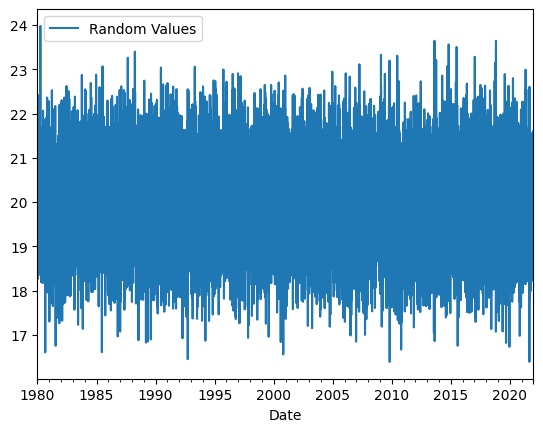

In [ ]:
df_new.plot()  # Plotting the entire data series

<ipython-input-65-03ddf2add90f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_new["1984"].plot()  # Plotting a sliced year data


<Axes: xlabel='Date'>

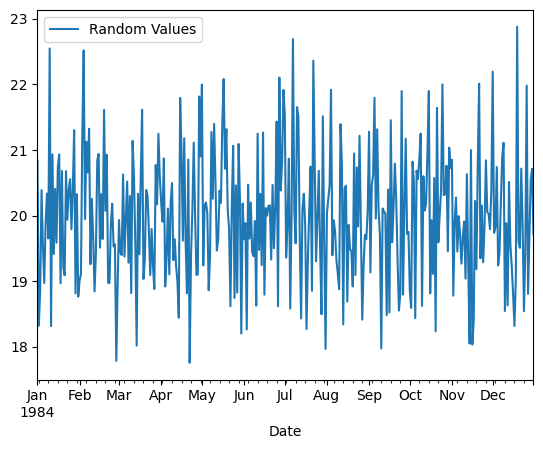

In [ ]:
df_new["1984"].plot()  # Plotting a sliced year data

<ipython-input-66-f0c2b2255bf5>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_new["1984-03"].plot()  # Plotting a sliced month data


<Axes: xlabel='Date'>

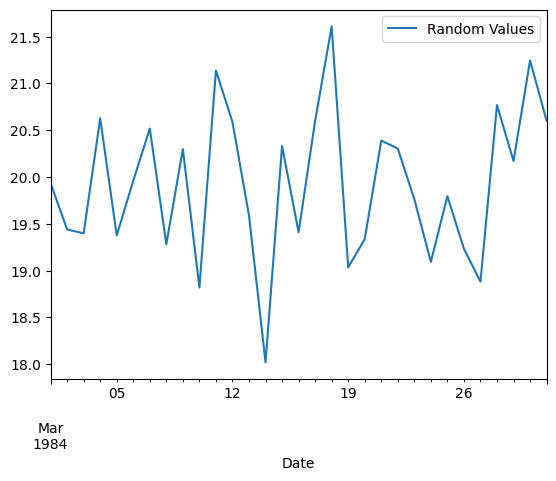

In [ ]:
df_new["1984-03"].plot()  # Plotting a sliced month data

<Axes: xlabel='Date'>

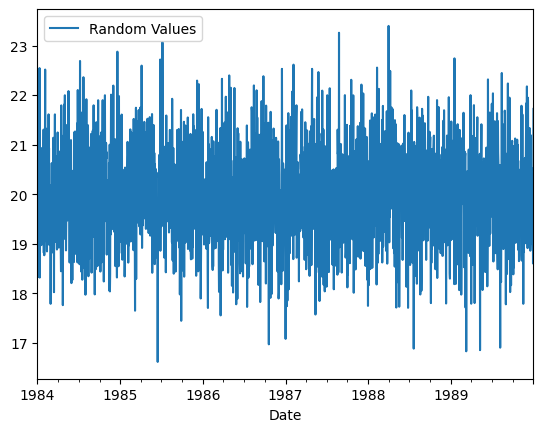

In [ ]:
df_new["1984":"1989"].plot()  # Plotting a sliced multi-year data

<Axes: xlabel='Date'>

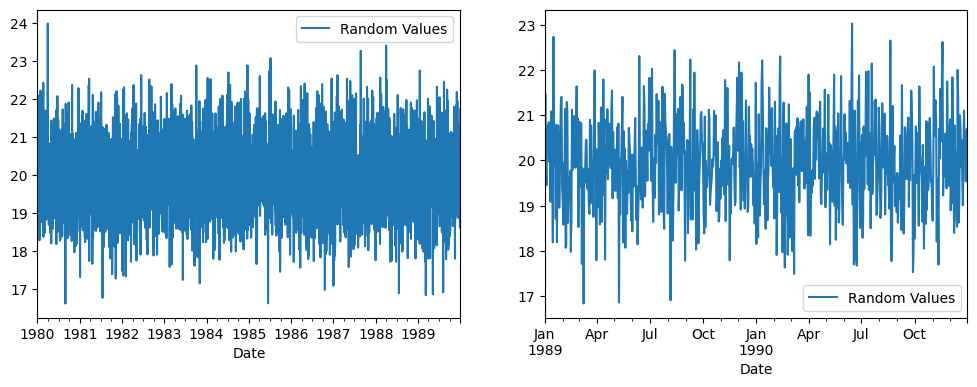

In [ ]:
# to plot into specific axes the axes to use can be provided with the `ax` argument
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
df_new[:"1989"].plot(ax=axes[0])
df_new["1989":"1990"].plot(ax=axes[1])

# **11. working with Comma-separated (.csv) files in pandas**

In this part, we shall briefly address working with csv files using pandas. A detail of working with spreadsheets will be treated in part 2 of this module.

In this section, we will download stocks data from Yahoo (https://finance.yahoo.com/quote/GOOG/history?) from January 1, 2005 to present. Download as a ".csv" file. Afterwards, we'll read data from the csv file using the **pd.read_csv()** method.

In [13]:
import pandas as pd
from pathlib import Path

url = '/content/sample_data/GOOG.csv'
df_stocks = pd.read_csv(url)

df_stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-21,93.239998,93.415001,92.000000,92.050003,92.050003,28367200
1,2023-02-22,91.933998,92.360001,90.870003,91.800003,91.800003,29891100
2,2023-02-23,92.129997,92.129997,90.010002,91.070000,91.070000,32423700
3,2023-02-24,89.629997,90.129997,88.860001,89.349998,89.349998,31295600
4,2023-02-27,90.089996,90.449997,89.610001,90.099998,90.099998,22724300
...,...,...,...,...,...,...,...
245,2024-02-12,149.539993,150.589996,148.559998,148.729996,148.729996,17236100
246,2024-02-13,146.070007,148.039993,145.110001,146.369995,146.369995,18138500
247,2024-02-14,147.369995,147.830002,145.554993,147.139999,147.139999,16651800
248,2024-02-15,144.460007,144.759995,141.880005,143.940002,143.940002,26724300


# **!!! N/B:  All the earlier defined pandas attributes and methods can be applied to this new DataFrame.**

In [14]:
df_stocks.head()     # Shows the top n-rows (default is 5) of the DataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-21,93.239998,93.415001,92.000000,92.050003,92.050003,28367200
1,2023-02-22,91.933998,92.360001,90.870003,91.800003,91.800003,29891100
2,2023-02-23,92.129997,92.129997,90.010002,91.070000,91.070000,32423700
3,2023-02-24,89.629997,90.129997,88.860001,89.349998,89.349998,31295600
4,2023-02-27,90.089996,90.449997,89.610001,90.099998,90.099998,22724300


In [15]:
df_stocks.tail()     # Shows the last n-rows (default is 5) of the DataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
245,2024-02-12,149.539993,150.589996,148.559998,148.729996,148.729996,17236100
246,2024-02-13,146.070007,148.039993,145.110001,146.369995,146.369995,18138500
247,2024-02-14,147.369995,147.830002,145.554993,147.139999,147.139999,16651800
248,2024-02-15,144.460007,144.759995,141.880005,143.940002,143.940002,26724300
249,2024-02-16,144.210007,144.479996,141.520004,141.759995,141.759995,21849700


In [21]:
df_stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

The process we've just gone through is often called "data wrangling":

**What is Data Wrangling?**

Data wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time. Data wrangling is increasingly ubiquitous. In simpler terms, data wrangling (sometimes referred to as data munging) entails transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.
Data has become more diverse and unstructured, demanding increased time spent culling, cleaning, and organizing data ahead of broader analysis. <br>

**Reference:** <br>
> https://www.trifacta.com/data-wrangling/ <br>
> https://en.wikipedia.org/wiki/Data_wrangling <br><br><br>



For some datasets, it is ideal to do some of the following:

> Vertically stacking the data using a DateTime index <br>
> Basic manipulation and dealing with missing values <br>
> Resampling to a different frequency


We won't focus on that here as our data seems clean. Revert if you find any issues with your data.
---------------------------------------------------------------------------------------------------------------------------------

In [17]:
df_stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,125.891892,127.350844,124.788136,126.122140,126.122140,2.397819e+07
std,15.578005,15.534565,15.494659,15.508306,15.508306,8.975276e+06
min,89.540001,90.129997,88.860001,89.349998,89.349998,8.828600e+06
25%,118.237499,120.922503,117.082503,119.199997,119.199997,1.821138e+07
50%,129.845001,131.427498,128.967499,130.159996,130.159996,2.180130e+07
75%,137.630005,138.870003,136.282497,137.914997,137.914997,2.656832e+07
max,154.009995,155.199997,152.919998,154.839996,154.839996,7.614030e+07


In [19]:
df_stocks.isnull().count()

Date         250
Open         250
High         250
Low          250
Close        250
Adj Close    250
Volume       250
dtype: int64

# **Let's format the Date column (currently an object data type) to a Datetime and set as the index for the DataFrame.**

In [23]:
df_stocks.Date

0      2023-02-21
1      2023-02-22
2      2023-02-23
3      2023-02-24
4      2023-02-27
          ...    
245    2024-02-12
246    2024-02-13
247    2024-02-14
248    2024-02-15
249    2024-02-16
Name: Date, Length: 250, dtype: object

In [24]:
pd.to_datetime(df_stocks.Date)

0     2023-02-21
1     2023-02-22
2     2023-02-23
3     2023-02-24
4     2023-02-27
         ...    
245   2024-02-12
246   2024-02-13
247   2024-02-14
248   2024-02-15
249   2024-02-16
Name: Date, Length: 250, dtype: datetime64[ns]

In [27]:
df_stocks.Date = pd.to_datetime(df_stocks.Date)    # Convert Date column to Datetime and pass back to override the initial column.
df_stocks = df_stocks.set_index('Date')                # Set formatted/new Date Column as DataFrame index
df_stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-21,93.239998,93.415001,92.000000,92.050003,92.050003,28367200
2023-02-22,91.933998,92.360001,90.870003,91.800003,91.800003,29891100
2023-02-23,92.129997,92.129997,90.010002,91.070000,91.070000,32423700
2023-02-24,89.629997,90.129997,88.860001,89.349998,89.349998,31295600
2023-02-27,90.089996,90.449997,89.610001,90.099998,90.099998,22724300
...,...,...,...,...,...,...
2024-02-12,149.539993,150.589996,148.559998,148.729996,148.729996,17236100
2024-02-13,146.070007,148.039993,145.110001,146.369995,146.369995,18138500
2024-02-14,147.369995,147.830002,145.554993,147.139999,147.139999,16651800


# **12. Visualisation with `seaborn`**

Seaborn is a Python data visualization library based on matplotlib **(https://seaborn.pydata.org/)**. It provides a high-level interface for drawing attractive and informative statistical graphics. `seaborn` can be installed with `pip` and `conda` as other python packages.

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

### KDE Plot

Let's start off with data distribution plots using Seaborn's Kernel Density Estimates (KDE), which is a method for estimating the underlying distribution that data is sampled from by smoothing the sampled using a Gaussian kernel. KDE represents the data using a continuous probability density curve in one or more dimensions. There are other ways of estimating the distribution. <br>

Seaborn allows us to visualize the distribution of these observations, analagous to a histogram.

Text(0.5, 0, 'Stocks')

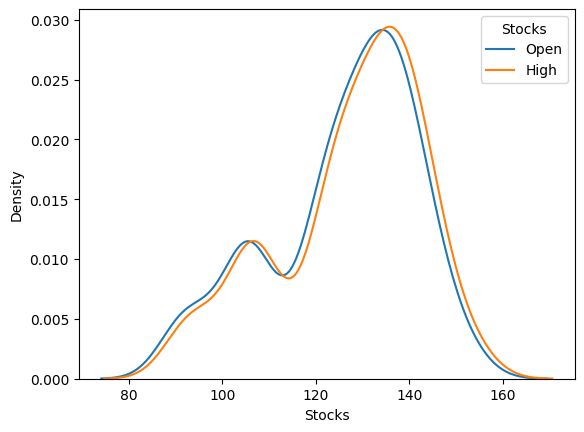

In [36]:
#### Sample Seaborn Visualizations
sns.kdeplot(
    df_stocks["Open"], legend=True, fill=False
)  # Distribution plot
sns.kdeplot(
    df_stocks["High"].astype(float), legend=True, fill=False
)  # Distribution plot

plt.legend(title="Stocks", loc="upper right", labels=["Open", "High"])
plt.xlabel("Stocks")

### Scatter Plot

Scatter plots represent values for two different numeric variables. Scatter plots are used to observe relationships between the two variables.

> Let's attempt to see if there's a synergy in the rainfall events in any two locations (eg. Kumasi and Tema)

<Axes: xlabel='High', ylabel='Open'>

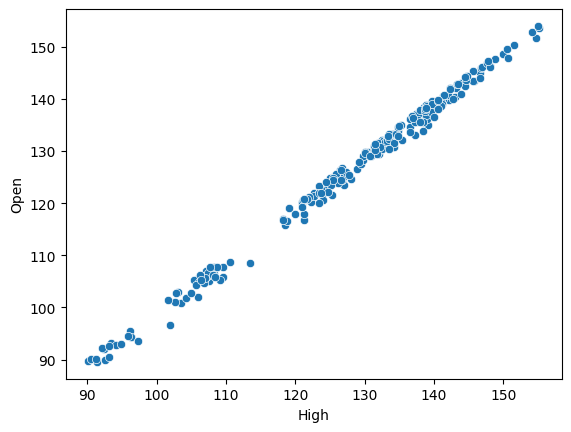

In [40]:
sns.scatterplot(y="Open", x="High", data=df_stocks)


### Joint Plot

Seaborn's jointplot draws a plot of two variables with bivariate and univariate graphs. The bivariate plot (bottom left) produces a clustered diagram, which is useful in cluster analysis.

> Histograms rather produced an error when this command was originally issued. This may not be same in your case. However, as control, the dataset was formatted to floats by using the astype() method and passing the function float as an argument.

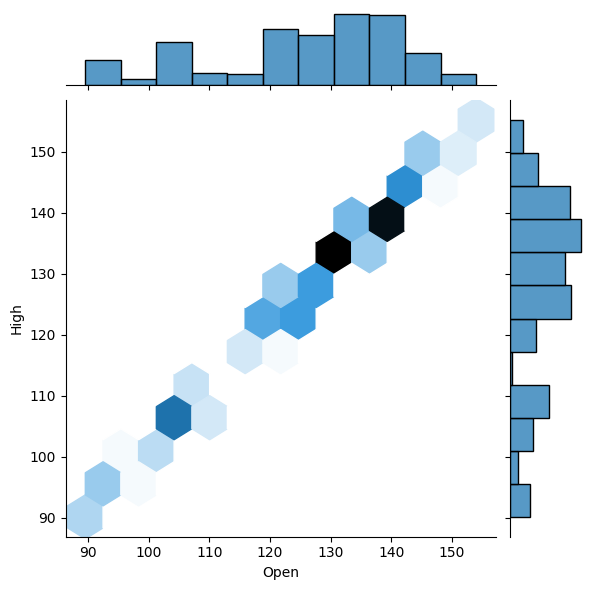

In [42]:
sns.jointplot(x="Open", y="High", data=df_stocks, kind="hex")


# **13. Grouping Data with Groupby() function**

Let's replicate the jointplot using monthly rainfall totals. Here, we will utilise the pandas groupby() function, in tandem with the Pandas Grouper class.

The Pandas groupby() method allows for creating categories or groupings, for groupwise approximations, function applications, etc.

```python
df.groupby(pd.Grouper(freq='Y')).aggregate(np.sum).plot()  # Annual Total
df.groupby(pd.Grouper(freq='M')).aggregate(np.sum).plot()  # Monthly Total
```

Alternatively, we can use the resample method (shown below): <br>

```python
df.resample('M').sum()   # Monthly Total
df.resample('Y').sum()   # Annual Total
```

You notice that we utilise the `pd.Grouper` class. A `Grouper` allows you to specify a groupby instruction for an object. This specification will select a column via the key parameter, or if the level and/or axis parameters are given, a level of the index of the target object. If axis and/or level are passed as keywords to both Grouper and groupby, the values passed to Grouper take precedence. In the example above, we pass the frequency as a datetime format (eg. "Y" for year, "M" for month, "MS" for start of month, etc.). This allows for grouping the dataframe into either yearly (first example) or monthly (second example) categories.

Thereafter, we employ the aggregate function, while passing as argument, the numpy summation function (`np.sum`). This produces the summation of each monthly or yearly grouping.

Now, let's replicate the jointplot using monthly rainfall totals.

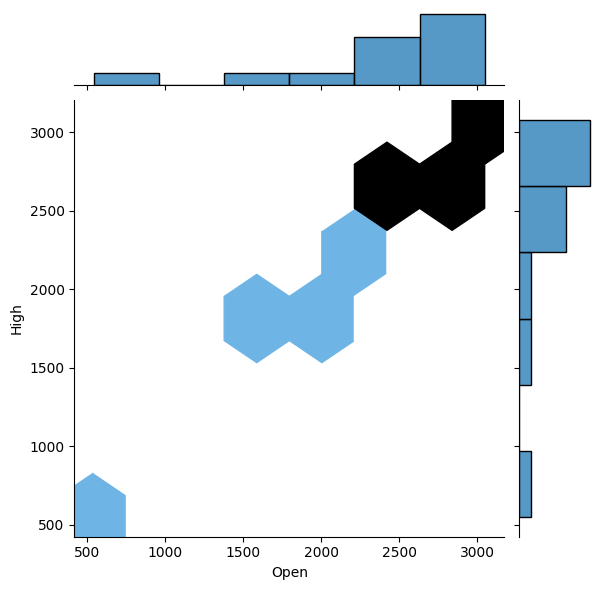

In [44]:
sns.jointplot(
    x="Open",
    y="High",
    data=df_stocks.groupby(pd.Grouper(freq="M")).sum(),
    kind="hex",
)


Pair Plot
----------------------------
A simple way of identifying relations between each numerical series of a dataframe.

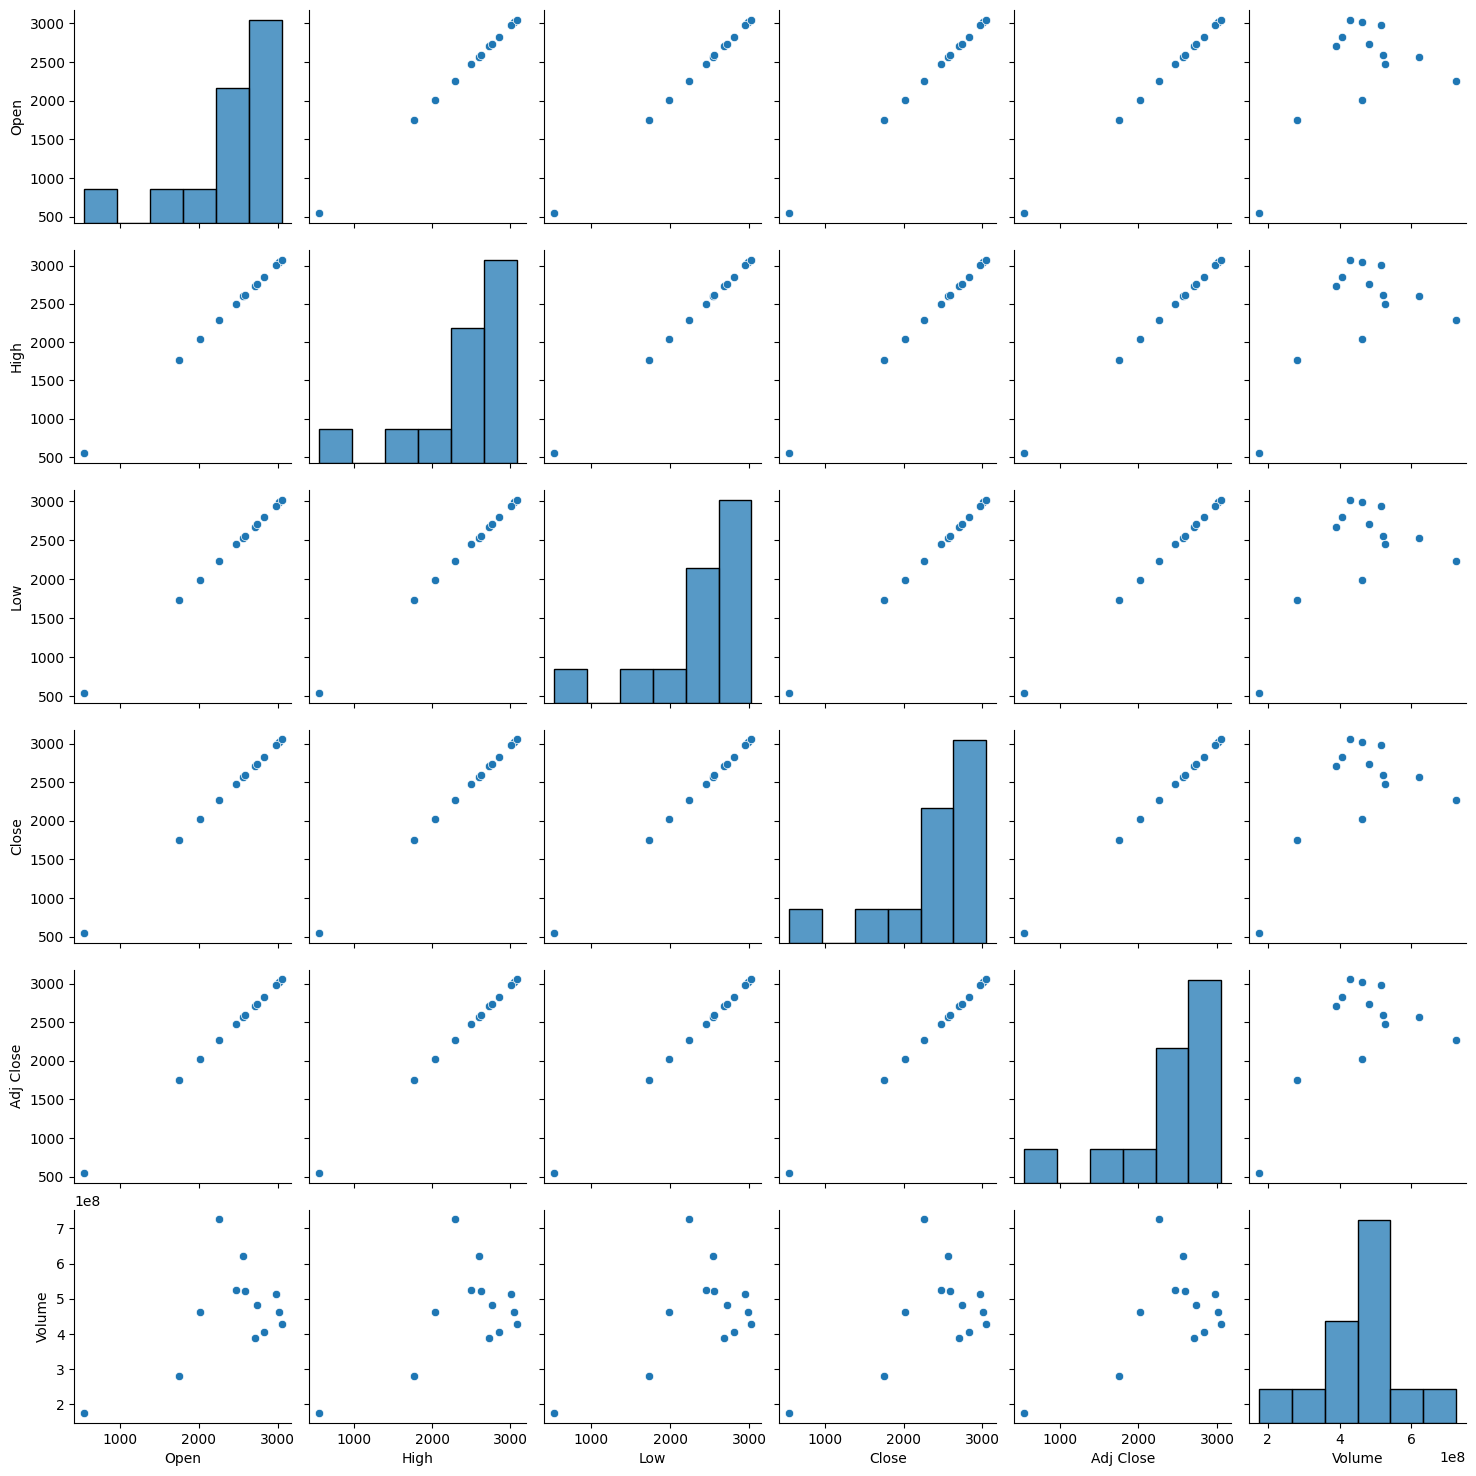

In [46]:
sns.pairplot(df_stocks.groupby(pd.Grouper(freq="M")).sum(), diag_kind="hist")

## By providing `subplots=True` to `DataFrame.plot(...)` each column will be put into its own subplot. The call will return the axes that the data was plotted into and we can then iterate over these to set the attributes of the plot that we would like:

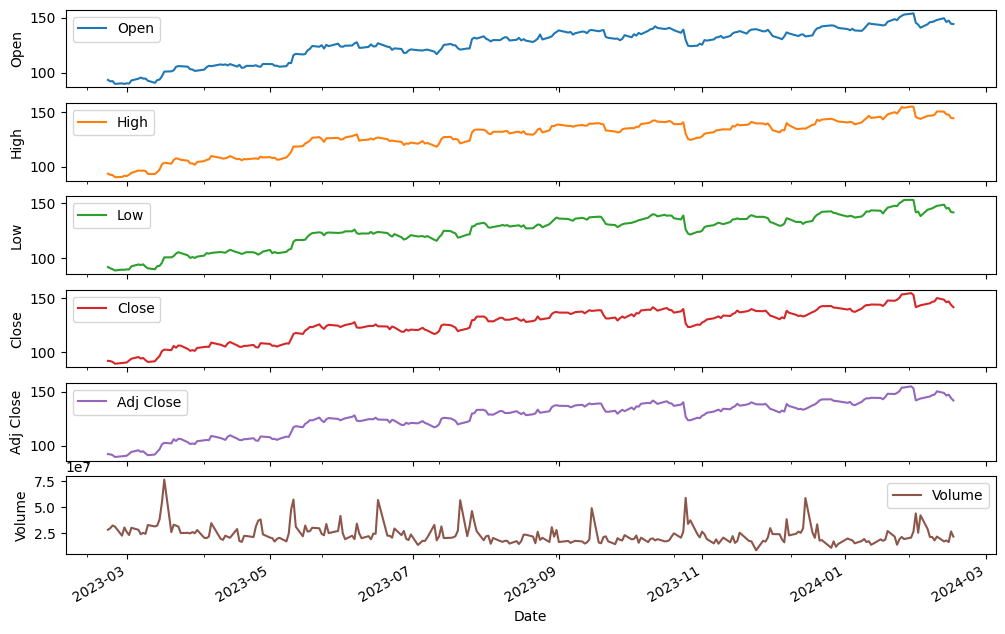

In [50]:
axes = df_stocks.plot(linestyle="-", figsize=(12, 8), subplots=True)
for i,ax in enumerate(axes):
    ax.set_ylabel(df_stocks.columns[i])


### grouped time-seires

We can also use the group-by operations to get resampled timeseries.

```python
df.groupby(pd.Grouper(freq='Y')).aggregate(np.sum).plot()  # Annual Total
df.groupby(pd.Grouper(freq='M')).aggregate(np.sum).plot()  # Monthly Total
```

<Axes: xlabel='Date'>

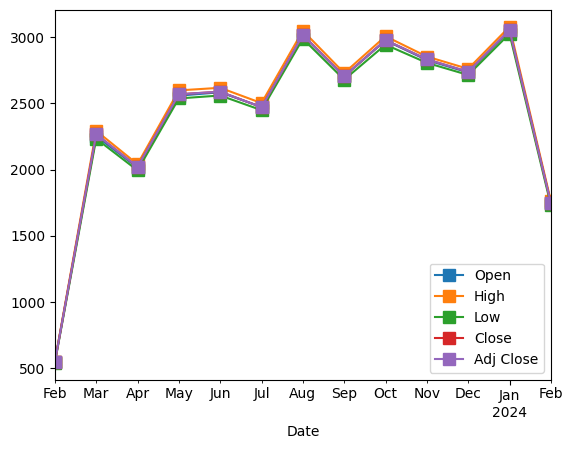

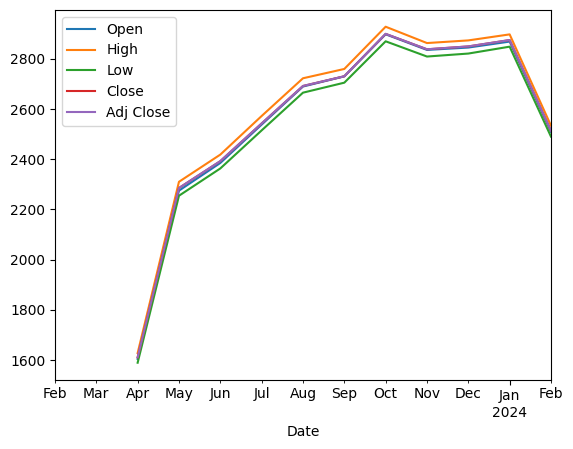

In [65]:
#### Moving Averages
df_Month_Data = df_stocks.groupby(pd.Grouper(freq="M")).sum()
df_Month_Data.drop('Volume', axis=1).plot(marker='s', markersize=8.5)
df_Month_Data.drop('Volume', axis=1).rolling(3).mean().plot()

# Another important statistical measure is data correlation. Data correlation can tell us, for example, if the data in different columns are correlated. We can use the .corr() method to get the correlation between different columns, as shown below:

In [67]:
df_stocks.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997646,0.997993,0.994731,0.994731,-0.316346
High,0.997646,1.000000,0.998088,0.997914,0.997914,-0.303097
Low,0.997993,0.998088,1.000000,0.997946,0.997946,-0.326069
Close,0.994731,0.997914,0.997946,1.000000,1.000000,-0.315845
Adj Close,0.994731,0.997914,0.997946,1.000000,1.000000,-0.315845
Volume,-0.316346,-0.303097,-0.326069,-0.315845,-0.315845,1.000000


**A correlation value of 1 tells us there is a high correlation and a correlation of 0 tells us that the data is not correlated at all.**

# We will end this Introduction to Pandas here and focus on some Machine Learning Concepts in the Next Class. Before then, do well to <font color='red'>read about Exploratory Data Analysis and Basic Statistics</font>, as it will form an integral foundation for the next class.

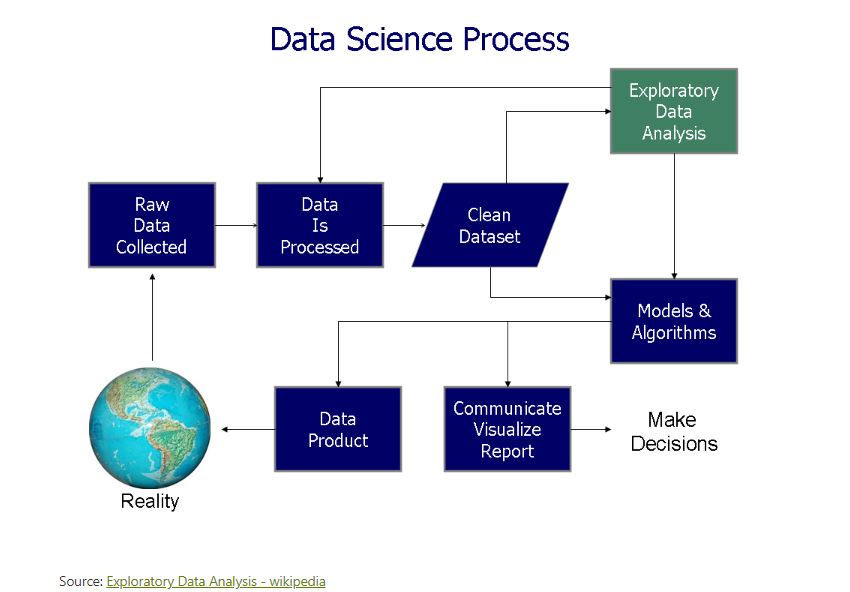

# **END OF TODAY'S CLASS**